In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

In [21]:
df=pd.read_excel('FOR_LAB_6.xlsx')
df.head(4)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Name,Product Base Margin,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,20847,High,0.01,2.84,0.93,3,Express Air,Corporate,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,...,West,Washington,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522
1,20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Global Troy™ Executive Leather Low-Back Tilter,0.60,...,West,California,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193
2,21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,...,East,New Jersey,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192
3,24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,...,Central,Minnesota,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838


In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['day'] = df['Order Date'].dt.day

df1 = df[df['Order Date'].dt.month ==6]
df1 = df1.groupby(['day'],).agg({'Sales': "sum"}).reset_index()
df1.head(4)

,day,Sales
0,1,6929.82
1,2,4790.69
2,3,10096.13
3,4,4178.57


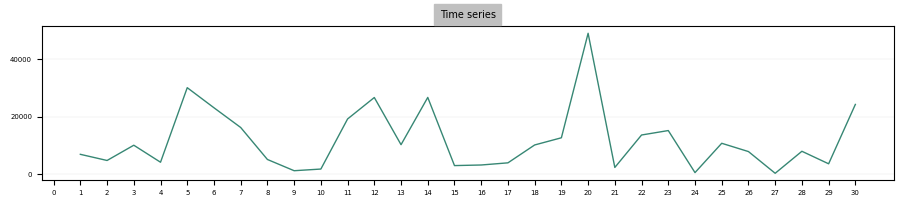

In [23]:
x = df1['day']
y = df1['Sales']


plt.figure(figsize = (11, 2))
plt.yticks(fontsize=5)
plt.xticks(range(0, 31, 1), fontsize = 5)
plt.title("Time series", fontsize = 7, backgroundcolor = "silver")
plt.grid(axis = 'y', linewidth = 0.1 )

plt.plot(x, y, color='#378774', linewidth = 1)

In [24]:
df_pie = df.groupby(['Ship Mode']).agg({'Shipping Cost': "sum"}).reset_index()
df_pie


,Ship Mode,Shipping Cost
0,Delivery Truck,12137.80
1,Express Air,2191.46
2,Regular Air,10984.57


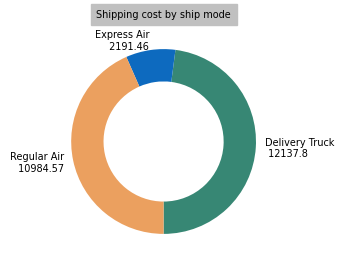

In [67]:
plt.figure(figsize = (3, 3))
labels = df_pie['Ship Mode']

values = df_pie['Shipping Cost']
labels = [f'{label}\n {size}' for label, size in zip(labels, sizes)]

plt.title("Shipping cost by ship mode", fontsize = 7, backgroundcolor = "silver")
plt.pie(values, wedgeprops={'width':0.35}, startangle=270, colors=['#378774','#0D6ABF','#EBA05F'], labels=labels, textprops={'fontsize': 7})
plt.show()


In [26]:
df_customers = pd.read_excel('FOR_LAB_6.xlsx', "Customers")
df_customers

df_orders = pd.read_excel('FOR_LAB_6.xlsx', "Orders") 
df_orders

df_join= pd.merge(df_customers,df_orders,on='Customer ID',how='inner')
df_join

df_sales = df_join.groupby(['Customer Name']).agg({'Sales': "sum"}).reset_index().sort_values('Sales', ascending=True)
df_sales = df_sales[df_sales['Sales'] >17000.00]
df_sales

,Customer Name,Sales
817,Neal Wolfe,17390.24
1031,Tammy Raynor,18642.71
323,Erin Ballard,20565.99
647,Lee Xu,20640.35
1127,Yvonne Mann,28779.13
937,Rosemary O'Brien,29916.01
1065,Toni Swanson,32194.12
830,Nina Horne Kelly,48295.12
620,Kristine Connolly,50475.31


<BarContainer object of 9 artists>

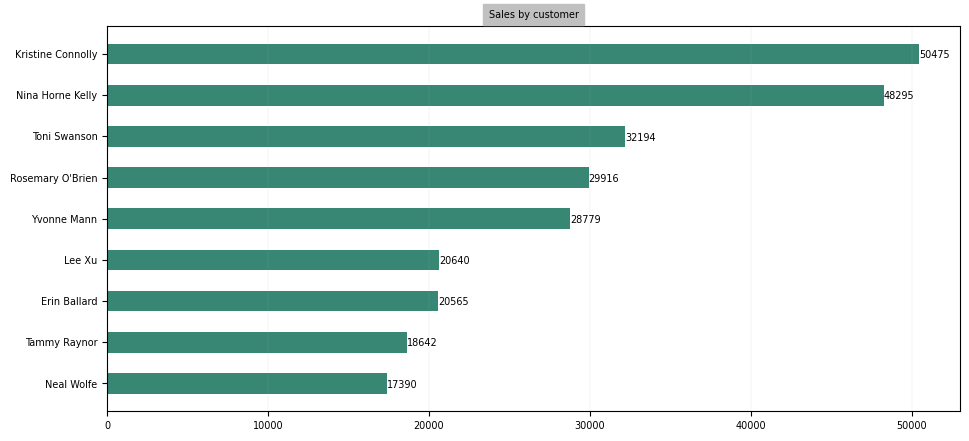

In [52]:
plt.figure(figsize =(11, 5))
plt.grid(axis = 'x', linewidth = 0.1)
plt.yticks(fontsize = 7)
plt.xticks(fontsize = 7)
plt.title("Sales by customer", fontsize = 7, backgroundcolor = "silver")
x = df_sales["Customer Name"]
y = df_sales["Sales"]


for index, value in enumerate(y):
    label = format(int(value))
    plt.annotate(label, xy=(value-10, index-0.1), color='black', fontsize = 7 )

plt.barh(x, y, color ='#378774', height = 0.5)


In [29]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


df['deliv_days'] = (df['Ship Date'] - df['Order Date']).dt.days
df.head(4)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Ship Mode,Customer Segment,Product Name,Product Base Margin,...,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,day,deliv_days
0,20847,High,0.01,2.84,0.93,3,Express Air,Corporate,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,...,Anacortes,98221,2015-01-07,2015-01-08,4.5600,4,13.01,88522,7,1
1,20228,Not Specified,0.02,500.98,26.00,5,Delivery Truck,Home Office,Global Troy™ Executive Leather Low-Back Tilter,0.60,...,San Gabriel,91776,2015-06-13,2015-06-15,4390.3665,12,6362.85,90193,13,2
2,21776,Critical,0.06,9.48,7.29,11,Regular Air,Home Office,"DAX Two-Tone Rosewood/Black Document Frame, De...",0.45,...,Roselle,7203,2015-02-15,2015-02-17,-53.8096,22,211.15,90192,15,2
3,24844,Medium,0.09,78.69,19.99,14,Regular Air,Small Business,Howard Miller 12-3/4 Diameter Accuwave DS ™ Wa...,0.43,...,Prior Lake,55372,2015-05-12,2015-05-14,803.4705,16,1164.45,86838,12,2


In [30]:
df_avg = df.groupby(['Ship Mode']).agg({'deliv_days':'mean'}).reset_index().sort_values('deliv_days',ascending=False)
df_avg = df_avg.round(2)
df_avg

,Ship Mode,deliv_days
2,Regular Air,1.97
0,Delivery Truck,1.89
1,Express Air,1.80


<BarContainer object of 3 artists>

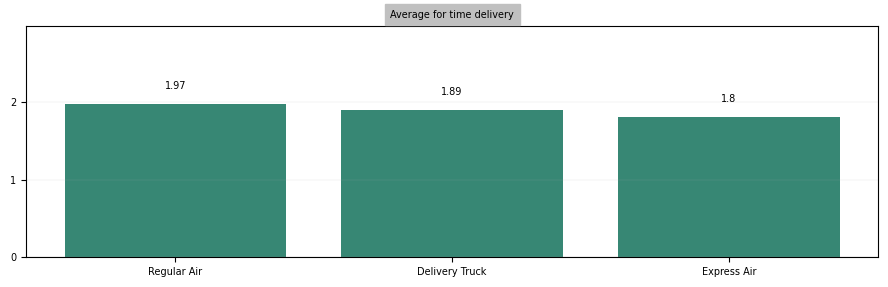

In [31]:
ax = df_avg['Ship Mode']
ay = df_avg['deliv_days']
plt.figure(figsize =(11, 3))

plt.grid(axis = 'y', linewidth = 0.1)

for i in range(len(ax)):
    plt.annotate(f'{ay[i]}', xy=(ax[i], ay[i] + 0.2), ha="center", fontsize = 7)
plt.ylim(0, max(ay)+1)

plt.yticks(range(0, 3, 1), fontsize = 7)
plt.xticks(fontsize = 7)
plt.title("Average for time delivery", fontsize = 7, backgroundcolor = "silver")

plt.bar(ax, ay, color ='#378774')